# A.I. Assignment 2

## Learning Goals

By the end of this lab, you should be able to:
* Perform some data preproscessing like: data scaling, normalisatin, encoding categorical features
* Feel comfortable with simple linear regression
* Feel comfortable with a regularization in ML


### Content:

The Lab. has 3 sections: 

1. Preprocessing
2. Simple Linear regression
3. Regularization

At the end of each section there is an exercise, each worthing 3 points. All the work must be done during the lab and uploaded on teams by the end of the lab. 


If there are any python libraries missing, please install them on your working environment. 

In [22]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

# Section 1. Preprocessing data

### Standardization, or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.


In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.


For instance, many elements used in the objective function of a learning algorithm may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

In [141]:
from sklearn import preprocessing

In [154]:
X_train = np.array([[ 1., -1.,  2.],
...                 [ 2.,  0.,  0.],
...                 [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [146]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [147]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [149]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Scaled data has zero mean and unit variance:

In [152]:
print("mean:", X_scaled.mean(axis=0),", std:",  X_scaled.std(axis=0))

mean: [0. 0. 0.] , std: [1. 1. 1.]


It is possible to disable either centering or scaling by either passing $with\_mean=False$ or $with\_std=False$ to the constructor of StandardScaler.

### Scaling features to a range

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using *MinMaxScaler* or *MaxAbsScaler*, respectively.

Here is an example to scale a simle data matrix to the $[0, 1]$ range:

In [155]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [156]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

It is possible to inspect the scaler attributes to find about the exact nature of the transformation learned on the training data:

In [157]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [158]:
 min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

If *MinMaxScaler* is given an explicit $feature\_range=(min, max)$ the full formula is:

$$ X_{std} = \frac{(X - X.min)}{ (X.max - X.min)} $$

$$ X_{scaled} = X_{std} * (max - min) + min$$

*MaxAbsScaler* works in a very similar fashion, but scales in a way that the training data lies within the range $[-1, 1]$ by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

Here is how to use the data from the previous example with this scaler:

In [159]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [160]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [161]:
max_abs_scaler.scale_

array([2., 1., 2.])

## Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the $l1$, $l2$, or $max$ norms:

In [162]:
X = [[ 1., -1.,  2.],
...  [ 2.,  0.,  0.],
...  [ 0.,  1., -1.]]

X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

## Encoding categorical features
Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as $[0, 1, 3]$ while ["female", "from Asia", "uses Chrome"] would be $[1, 2, 1]$.

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers ($0$ to $n_{categories} - 1$):

In [163]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

In [164]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

By default, *OrdinalEncoder* will also passthrough missing values that are indicated by *np.nan*.

In [165]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

OrdinalEncoder provides a parameter encoded_missing_value to encode the missing values without the need to create a pipeline and using SimpleImputer.

In [166]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

***Exercise 1***

Load the dataset *WA_Fn-UseC_-Telco-Customer-Churn.csv* provided. Perform transformations on it so it is prepared to build a model (scaling the numerical data and the cathegorical features transformed in numerical integer labels.  

In [3]:
# Exercise 1

import pandas as pd
from sklearn import preprocessing

file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
dataset = pd.read_csv(file_path) 

# We clean the dataset by removing the rows with missing values (incomplete data)
dataset.replace(' ', pd.NA, inplace=True)
dataset = dataset.dropna()

# Categorical columns encoding
label_encoder = preprocessing.OrdinalEncoder()
categorical_columns = [['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
label_encoder.fit(categorical_columns)

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Numerical columns scaling
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

print(dataset.head())

   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG     0.0              0      1.0         0.0 -1.280248   
1  5575-GNVDE     1.0              0      0.0         0.0  0.064303   
2  3668-QPYBK     1.0              0      0.0         0.0 -1.239504   
3  7795-CFOCW     1.0              0      0.0         0.0  0.512486   
4  9237-HQITU     0.0              0      0.0         0.0 -1.239504   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0           0.0            1.0              0.0             0.0  ...   
1           1.0            0.0              0.0             2.0  ...   
2           1.0            0.0              0.0             2.0  ...   
3           0.0            1.0              0.0             2.0  ...   
4           1.0            0.0              1.0             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0  

# Section 2. Simple linear regression

Linear regression is defined as an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. 

Most of the major concepts in machine learning can be and often are discussed in terms of various linear regression models. Thus, this section will introduce you to building and fitting linear regression models and some of the process behind it, so that you can 

1. fit models to data you encounter 

1. experiment with different kinds of linear regression and observe their effects

1. see some of the technology that makes regression models work.

### Linear regression with a simple dataset

Lets build first a very problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i \in \{ 1, 2, 3 \}$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $a x + b = y$ that passes through all three observations, since the data are not collinear. Thus our aim is to find the line that best fits these observations in the *least-squares sense*.

In [167]:
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [168]:
x_train.shape

(3,)

In [169]:
x_train = x_train.reshape(3,1)
x_train.shape

(3, 1)

(3, 1) (3,)


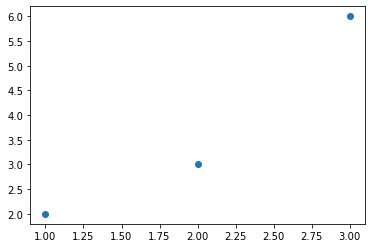

In [170]:
# Make a simple scatterplot
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

<AxesSubplot: title={'center': 'A nice plot'}, xlabel='$x$', ylabel='$y$'>

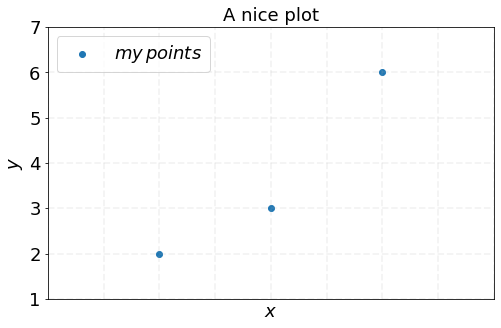

In [171]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$My points$')
    #ax.scatter(x, y, label='$My points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'A nice plot')


#### Formulae
Linear regression is special among the models we study because it can be solved explicitly. While most other models (and even some advanced versions of linear regression) must be solved itteratively, linear regression has a formula where you can simply plug in the data.

For the single predictor case it is:
    \begin{align}
      a &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      b &= \bar{y} - a \bar{x}\
    \end{align}
    
Where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively.

###  Building a model from scratch

We will solve the equations for simple linear regression and find the best fit solution to our simple problem.

The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

We have to reshape our arrrays to 2D. We will see later why.

In [172]:
#solution
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
xxx.shape

(3, 2)

In [173]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

(3, 1)


In [174]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

() ()


* Why the empty brackets? (The numerator and denominator are scalars, as expected.)

In [175]:
#slope beta1
a = numerator/denominator

#intercept beta0
b = y_bar - a * x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(b, a))
print(f'The best fit is {b}')

The best-fit line is -0.33 + 2.00 * x
The best fit is -0.3333333333333335


In [176]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope a
    a = numerator/denominator

    #intercept b
    b = y_bar - beta_1*x_bar

    return np.array([b,a])

* Let's run this function and see the coefficients

In [177]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

coeficients = simple_linear_regression_fit(x_train, y_train)

a = coeficients[1]
b = coeficients[0]

print("The best-fit line is {1:8.6f} * x + {0:8.6f}.".format(a, b))

Reshaping features array.
Reshaping observations array.
The best-fit line is 0.666667 * x + 1.000000.


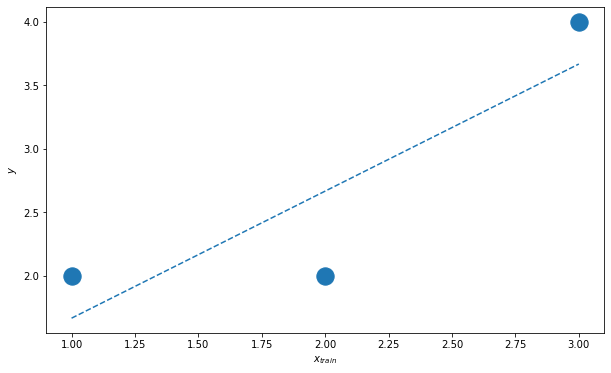

In [178]:
# %load solutions/best_fit_scatterplot.py
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3]]).T

best_fit = b + a * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');


The values of `a` and `b` seem roughly reasonable.  They capture the positive correlation.  The line does appear to be trying to get as close as possible to all the points.

## 4 - Building a model with `statsmodels` and `sklearn`

Now that we can concretely fit the training data from scratch, let's learn two `python` packages to do it all for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $a$ and $b$ from `statsmodels` and `sklearn` to the ones that we found from above with our own implementation.

For the purposes of this lab, `statsmodels` and `sklearn` do the same thing.  More generally though, `statsmodels` tends to be easier for inference \[finding the values of the slope and intercept and dicussing uncertainty in those values\], whereas `sklearn` has machine-learning algorithms and is better for prediction \[guessing y values for a given x value\]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

**Note:** `statsmodels` and `sklearn` are different packages!  Unless we specify otherwise, you can use either one.

below is the code for `statsmodels`.  `Statsmodels` does not by default include the column of ones in the $X$ matrix, so we include it manually with `sm.add_constant`.

In [179]:
import statsmodels.api as sm

In [180]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coef from statsmodels are: beta_0 = 0.666667 and beta_1 = 1.000000


Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.

In [181]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Sun, 05 Mar 2023   Prob (F-statistic):              0.333
Time:                        21:54:07   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

Now let's turn our attention to the `sklearn` library.

In [182]:
from sklearn import linear_model

In [183]:
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

The regression coefficients from the sklearn package are: beta_0 = 0.666667 and beta_1 = 1.000000


Same results! We can try a real problem now.

### The `scikit-learn` library and the shape of things

Before diving into a "real" problem, let's discuss more of the details of `sklearn`.

`Scikit-learn` is the main `Python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split()`. 

Use the following to add the library into your code:

```python
import sklearn 
```

In `scikit-learn`, an **estimator** is a Python object that implements the methods `fit(X, y)` and `predict(T)`

Let's see the structure of `scikit-learn` needed to make these fits. `fit()` always takes two arguments:
```python
estimator.fit(Xtrain, ytrain)
```
We will consider one estimator in this lab: `LinearRegression`.

It is very important to understand that `Xtrain` must be in the form of a **2x2 array** with each row corresponding to one sample, and each column corresponding to the feature values for that sample.

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

In [184]:
#we load the dataset (be sure that this file is in the same folder with the j. notebook)
df = pd.read_csv('Salary_dataset.csv')

In [185]:
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(df.head())
X = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [187]:
X_train

array([ 5.4,  8. ,  3. ,  5.2,  3.3,  4.6,  8.3,  6.9,  1.4, 10.6,  3.1,
        2.3,  6. ,  6.1,  3.8,  3.3,  9.1,  2.1,  1.2,  7.2,  5. ,  4.1])

In [188]:
y_train

array([ 83089., 101303.,  56643.,  66030.,  64446.,  61112., 113813.,
        91739.,  46206., 121873.,  60151.,  39892.,  81364.,  93941.,
        57190.,  54446., 105583.,  43526.,  39344.,  98274.,  67939.,
        56958.])

In [137]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# we perform the regression
lr = LinearRegression().fit(X_train, y_train)


print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.94
Linear Regression-Test set score: 0.98


To fnd the coeficients from the formula $ax + b = y$ we have the following:

In [199]:
a = lr.coef_[0] # we ahve one feature with index 0

b = lr.intercept_ # a scalar
 
print(a, "* x +", b, "= y")

9379.710491946016 * x + 26049.720267542645 = y


Now that we have the model let's make a prediction:

In [190]:
lr.predict([[20]])

array([213643.93010646])

In [200]:
a * 20 + b

213643.93010646297

In other words our model predicted that we get after 20 years a salary of 213643.9. 

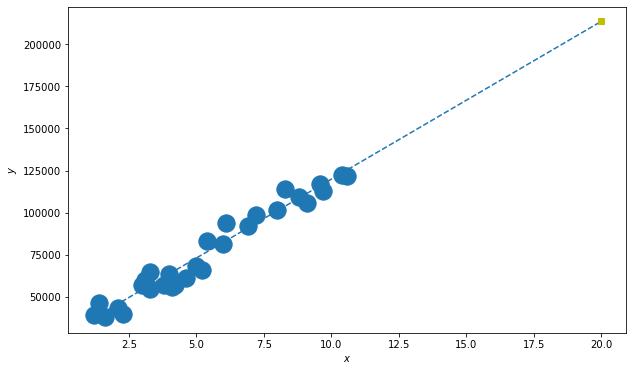

In [209]:
pred = lr.predict([[20]])
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))


x = X.T

best_fit = b + a * (np.append(x, [20]))

ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[20]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([20],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');


***Exercise 2***

Download from https://www.kaggle.com/ the regression dataset: Student Study Hours. Create a model and make 3 predictions. Make some nice graphics to depict the model (training set, test set, predictions). 

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


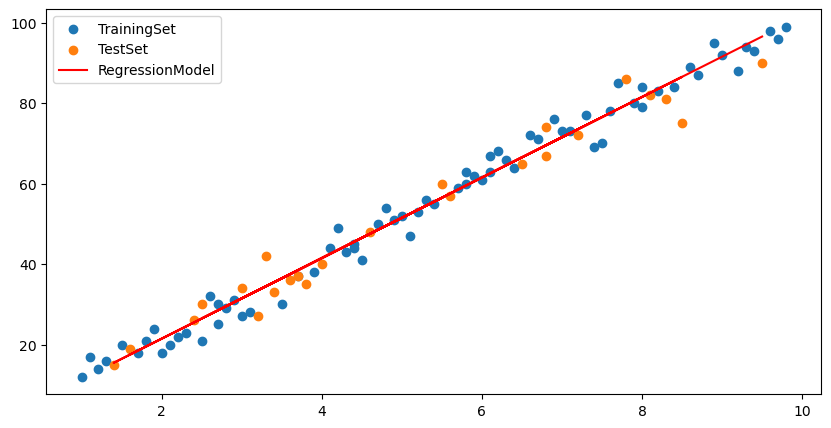

In [2]:
# Exercise 2
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = 'scores.csv'
df = pd.read_csv(file_path) 
print(df.head())

# Prepare data
x = np.array(df['Hours'])
y = np.array(df['Scores'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Reshape features into 2D arrays
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Train model
lr = LinearRegression().fit(x_train, y_train)
lr.predict([[7.2]])
y_prediction = lr.predict(x_test)

# Plot results
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, label='TrainingSet')
plt.scatter(x_test, y_test, label='TestSet')
plt.plot(x_test, y_prediction, color='red', label='RegressionModel')

plt.legend()
plt.show()

# Section 3. Regularization

- restricting a model to avoid overfitting by shrinking the coefficient estimates to zero. 

To avoid overfitting we control the model’s complexity by adding a penalty to the model’s loss function:

$$\text{ Regularization} = \text{Loss Function} + \text{Penalty} $$

There are three commonly used regularization techniques to control the complexity of machine learning models, as follows:

* L2 regularization
* L1 regularization
* Elastic Net


## L2 regularisation

A *ridge* regression -- a regularization term is added to the cost function of the linear regression, which keeps the magnitude of the model’s weights (coefficients) as small as possible. The L2 regularization technique tries to keep the model’s weights close to zero, but not zero, which means each feature should have a low impact on the output while the model’s accuracy should be as high as possible.
 
 $$ \text{Ridge Regression Cost Function} = \text{Loss Function} + \frac{1}{2}\lambda \sum_{j=1}^m \omega_j^2$$

Where $\lambda$  controls the strength of regularization, and  $\omega$ are the model’s weights (coefficients).

By increasing $\lambda$, the model becomes flattered and underfit. On the other hand, by decreasing $\lambda$, the model becomes more overfit, and with $\lambda = 0$, the regularization term will be eliminated.

In [214]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.94
Ridge Regression-Test set score: 0.98


## L1 Regularization

Least Absolute Shrinkage and Selection Operator (lasso) regression is an alternative to ridge for regularizing linear regression. Lasso regression also adds a penalty term to the cost function, but slightly different, called $L1$ regularization. $L1$ regularization makes some coefficients zero, meaning the model will ignore those features. Ignoring the least important features helps emphasize the model’s essential features.

$$ \text{Lasso Regrestion Cost Function} = \text{Loss Function} + r \lambda \sum_{j=1}^m |wj|$$

Where $\lambda$  controls the strength of regularization, and $\omega$ are the model’s weights (coefficients).

Lasso regression automatically performs feature selection by eliminating the least important features.

In [213]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.94
Lasso Regression-Test set score: 0.98


## Elastic Net
The Elastic Net is a regularized regression technique combining ridge and lasso’s regularization terms. The 
 parameter controls the combination ratio. When 
, the L2 term will be eliminated, and when 
, the L1 term will be removed.

$$\text{Elastic Net Cost Function} = \text{Loss Function} + r \lambda \sum_{j=1}^m |wj|+ \dfrac{(1-r)}{2} \lambda\sum_{j=1}^m w_j^2$$

Although combining the penalties of lasso and ridge usually works better than only using one of the regularization techniques, adjusting two parameters, 
 and 
, is a little tricky.

In [215]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.94
Elastic Net-Test set score: 0.98


***Exercise 3***

For your build previous model perform all three regularizations presented here.  

In [1]:
# Exercise 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = 'scores.csv'
df = pd.read_csv(file_path) 

# Drop rows with missing values
df.replace(' ', pd.NA, inplace=True)
df = df.dropna()

# Train and test the data
X = np.array(df['Hours'])
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Regularization
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
ridge =  Ridge(alpha=0.7).fit(X_train, y_train)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Lasso Regression Training set score: {lasso.score(X_test, y_test):.2f}")
print(f"Ridge Regression Training set score: {ridge.score(X_test, y_test):.2f}")
print(f"Elastic Net Training set score: {elastic_net.score(X_test, y_test):.2f}")

Lasso Regression Training set score: 0.97
Ridge Regression Training set score: 0.97
Elastic Net Training set score: 0.97
